# 1 LIBRERÍAS NECESARIAS

In [1]:
!pip install missingno missingpy missforest statsmodels

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from missforest import MissForest
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# 2 CARGAR EL DATA FRAME

## 2.1 CREAR EL DATA FRAME CON PANDAS

In [3]:
df_sin_limpiar = pd.read_csv("C:\\Users\\ingen\\OneDrive\\Escritorio\\CURSO DE DATA SCIENCE\\cathycaz-intro-ml\\data\\raw\\bank-marketing-campaign-data.csv", sep=";")
# CON ESTE CÓDIGO SE IMPORTA EL DOCUMENTO CON FORMATO CSV
df_sin_limpiar.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2.2 MOSTRAR TODAS LAS COLUMNAS DEL DATA FRAME

In [4]:
pd.set_option('display.max_columns', None) # ESTO SIRVE PARA QUE ME MUESTRE TODAS LAS COLUMNAS CUANDO UN DATAFRAME ES MUY ANCHO O CON MUCHAS COLUMNAS 
# CON EL (None) LE DIGO QUE ME MUESTRE TODAS LAS COLUMNAS SIN LIMITACIÓN
df_sin_limpiar.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2.3 MOSTRAR INFORMACIÓN DEL DATA FRAME

In [5]:
df_sin_limpiar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# 3 CRIBADO MANUAL 

## 3.1 DEFINIR EL OBJETIVO: 

EL OBJETIVO ES CREAR UN ALGORITMO DE CLASIFICACIÓN QUE AYUDE A PREDECIR SI UN CLIENTE CONTRATARÁ O NO UN DEPÓSITO A LARGO PLAZO.

## 3.2 CREAR UNA COPIA DEL DATA FRAME, PARA TRABAJAR SOBRE ESA COPIA SIN MODIFICAR LA ORIGINAL

In [6]:
df = df_sin_limpiar.copy()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 3.3 COMPROBACIÓN DE CUANTOS VALORES ÚNICOS HAY EN CADA COLUMNA

In [7]:
unicos = df.nunique()
unicos

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

## 3.4 COMPROBACIÓN CUÁNTOS VALORES ÚNICOS IGUAL A 1 HAY POR CADA COLUMNA 

In [8]:
df[unicos[unicos==1].index]

""
0
1
2
3
4
...
41183
41184
41185
41186


CONCLUSIÓN:  NO HAY VALORES ÚNICOS IGUAL A 1 EN NINGUNA COLUMNA!!

## 3.5 COMPROBACIÓN DE DATOS DUPLICADOS EN FILAS

In [9]:
df.duplicated().sum()

np.int64(12)

CONCLUSIÓN: TENEMOS 12 FILAS DUPLICADOS EN EL DATAFRAME

In [10]:
df.duplicated(keep=False) 

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

NOTAS IMPORTANTES!!

Este método devuelve una Serie booleana (una columna de valores True/False) con el mismo índice que el DataFrame original:

True: Indica que la fila está duplicada (aparece más de una vez)

False: Indica que la fila es única (no tiene duplicados)

## 3.6 ELIMINAMOS FILAS DUPLICADAS 

In [11]:
df.drop_duplicates(keep='first', inplace=True)

NOTAS IMPORTANTES!! 

El parámetro keep acepta tres valores posibles:


'first' : Conserva la primera ocurrencia de cada fila duplicada

'last' : Conserva la última ocurrencia de cada fila duplicada

False : Elimina todas las filas duplicadas (no conserva ninguna)

### 3.6.1 COMPROBAR QUE HEMOS ELIMINADO LOS DUPLICADOS

In [12]:
df.duplicated().sum()

np.int64(0)

CONCLUSIÓN:  YA NO TENEMOS FILAS DUPLICADAS EN EL DATA FRAME

## 3.7 COMPROBACIÓN DE DATOS DUPLICADOS EN COLUMNAS CON LA TRANSPUESTA

In [13]:
df.T.duplicated().sum()

np.int64(0)

CONCLUSIÓN: NO HAY COLUMNAS QUE TENGAN EXACTAMENTE LOS MISMOS DATOS

## 3.8 VERIFICACIÓN DE DATOS FALTANTES EN COLUMNAS

In [14]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
df.isnull().mean()*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

CONCLUSIÓN: ESTO ME ARROJA QUE NO HAY DATOS FALTANTES, PERO NO PODEMOS CONCLUIR DE MANERA 100 % SEGURA QUE NO HAY DATOS FALTANTES SOLO APLICANDO ISNULL, YA QUE ESTE DATA FRAME TIENE DATOS DE TIPO OBJECT Y PUEDEN EXISTIR VALORES FALTANTES ENMASCARADOS EN FORMA DE TEXTO, DEBIDO A QUE ISSNULL SOLO DETECTA VALORES NaN O None. ENTONCES LO CORRECTO ES ESTUDIAR MAS A FONDO ESTE DATA FRAME:

POSIBLES CASOS DE DATOS ENMASCARADOS:

- "unknown" (muy común en datos bancarios)
- "?" 
- "N/A", "n/a", "NA"
- Espacios vacíos o cadenas vacías ""

## 3.9 ESTUDIAMOS A FONDO SI REALMENTE NO HAY DATOS FALTANTES!!

### 3.9.1 VISUALIZAR COLUMNAS CON VALORES DE TIPO OBJECT

In [16]:
df.select_dtypes(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


### 3.9.2 ANÁLISIS DETALLADO DE CADA COLUMNA DE TEXTO PARA ENCONTRAR POSIBLES VALORES ENMASCARADOS

In [17]:
# Ahora vamos a ver que valores únicos tiene cada columna de texto. Esto nos ayudará a identificar valores sospechosos.
for columna in df.select_dtypes(include='object').columns: # → Recorre todas las columnas de texto
    print(f"\n{'-'*25}")
    print(f"COLUMNA: {columna}")
    print(f"{'-'*25}")
    print(df[columna].value_counts()) # Muestra cada valor único y cuántas veces aparece, ordenado de mayor a menor frecuencia
    print(f"\nTotal de valores únicos: {df[columna].nunique()}") # → Cuenta cuántos valores diferentes hay en total


-------------------------
COLUMNA: job
-------------------------
job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Total de valores únicos: 12

-------------------------
COLUMNA: marital
-------------------------
marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

Total de valores únicos: 4

-------------------------
COLUMNA: education
-------------------------
education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

Total de valores únicos: 8

-------------------------


CONCLUSIÓN: DE ACUERDO AL ÁNALISIS REALIZADO POR CADA COLUMNA DE TIPO OBJECT PODEMOS CONCLUIR QUE LOS ÚNICOS VALORES SOSPECHOSO COMO FALTANTE QUE DEBEMOS ESTUDIAR ES "unknown" Y "nonexistent"

### 3.9.3 DETERMINAR Y CONTABILIZAR COLUMNAS CON VALORES "unknown" y "nonexistent"

In [18]:
# ITERAMOS SOLO POR LAS COLUMNAS QUE TIENEN DATOS TIPO 'OBJECT' (TEXTO)
for columna in df.select_dtypes(include='object').columns: # → Filtra solo las columnas de texto (las numéricas no pueden tener "unknown")
    # CONTAMOS CUÁNTOS VALORES "unknown" HAY EN CADA COLUMNA
    count_unknown = (df[columna] == 'unknown').sum() # → Cuenta cuántas veces aparece exactamente "unknown" en esa columna

    
    if count_unknown > 0:
        # SI HAY "unknown", MOSTRAMOS CUÁNTOS
        porcentaje = (count_unknown / len(df)) * 100
        print(f"{columna}: {count_unknown} valores 'unknown' ({porcentaje:.2f}%)")

job: 330 valores 'unknown' (0.80%)
marital: 80 valores 'unknown' (0.19%)
education: 1730 valores 'unknown' (4.20%)
default: 8596 valores 'unknown' (20.88%)
housing: 990 valores 'unknown' (2.40%)
loan: 990 valores 'unknown' (2.40%)


In [19]:
# ITERAMOS SOLO POR LAS COLUMNAS QUE TIENEN DATOS TIPO 'OBJECT' (TEXTO)
for columna in df.select_dtypes(include='object').columns: # → Filtra solo las columnas de texto (las numéricas no pueden tener "unknown")
    # CONTAMOS CUÁNTOS VALORES "nonexistent" HAY EN CADA COLUMNA
    count_unknown = (df[columna] == 'nonexistent').sum() # → Cuenta cuántas veces aparece exactamente "nonexistent" en esa columna

    
    if count_unknown > 0:
        # SI HAY "nonexistent", MOSTRAMOS CUÁNTOS
        porcentaje = (count_unknown / len(df)) * 100
        print(f"{columna}: {count_unknown} valores 'nonexistent' ({porcentaje:.2f}%)")

poutcome: 35551 valores 'nonexistent' (86.34%)


### 3.9.4 GRÁFICAMOS Y CONVERTIMOS EN NAN LOS 'unknown', 'nonexistent' PARA VISUALIZARLO MEJOR 

age                0.00
job                0.80
marital            0.19
education          4.20
default           20.88
housing            2.40
loan               2.40
contact            0.00
month              0.00
day_of_week        0.00
duration           0.00
campaign           0.00
pdays              0.00
previous           0.00
poutcome          86.34
emp.var.rate       0.00
cons.price.idx     0.00
cons.conf.idx      0.00
euribor3m          0.00
nr.employed        0.00
y                  0.00
dtype: float64


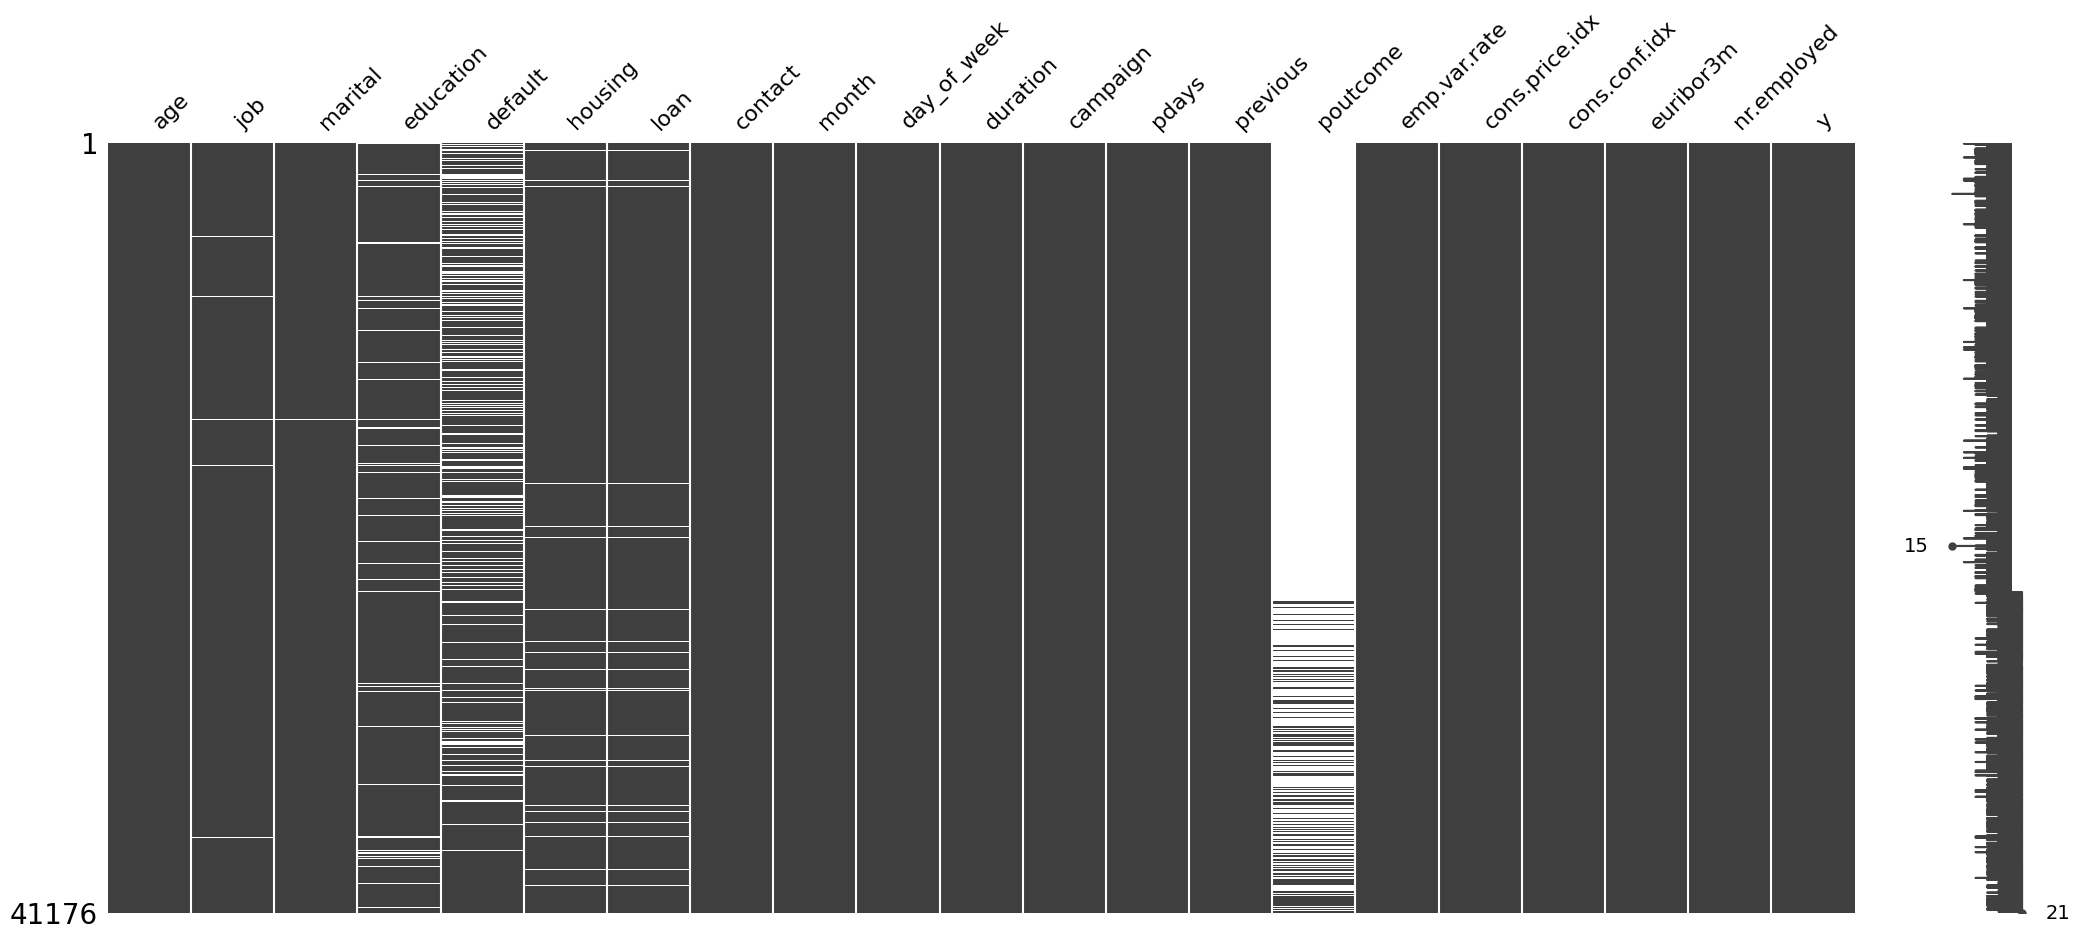

In [20]:
df = df.replace(['unknown', 'nonexistent'], np.nan)
print((df.isnull().sum()* 100 / len(df)).round(2))
msno.matrix(df)
plt.show()

### 3.9.5 VERIFICAR DATOS FALTANTES EN FILAS MAYORES AL 40% 

In [21]:
df_filas_faltantes = (df.T.isnull().sum()* 100 / len(df)).round(2)
print(df_filas_faltantes[df_filas_faltantes > 0.40])

Series([], dtype: float64)


CONCLUSIÓN: NO HAY FILAS CON UN NUMERO MAYOR A 40% DE DATOS FALTANTES

### 3.9.6 VERIFICAR SI AHORA SE CONTABILIZAN LOS DATOS FALTANTES EN COLUMNAS

In [22]:
df.isna().sum()

age                   0
job                 330
marital              80
education          1730
default            8596
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome          35551
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

CONCLUSIÓN: AHORA SI ME CUENTA CORRECTAMENTE LOS DATOS FALTANTES DESPUÉS DE CONVERTIRLOS EN NAN

### 3.9.7 NOTA ADICIONAL: BÚSQUEDA DE MÚLTIPLES VALORES ENMASCARADOS (EN ESTE CASO NO ES NECESARIO PERO COMO APORTE GENERAL GUARDAMOS ESTE CÓDIGO QUE FUNCIONA DE MANERA MAS AMPLIA)

In [23]:
# LISTA DE VALORES QUE PUEDEN REPRESENTAR DATOS FALTANTES
valores_faltantes = ['unknown', 'Unknown', 'UNKNOWN', '?', 'N/A', 'n/a', 'NA', 
                     'none', 'None', 'NONE', 'null', 'NULL', '', ' ', 'nonexistent']

# CREAR UN DICCIONARIO PARA GUARDAR LOS RESULTADOS
resultados = {}

# BUSCAR EN TODAS LAS COLUMNAS DE TEXTO
for columna in df.select_dtypes(include='object').columns:
    encontrados = []
    
    for valor in valores_faltantes:
        count = (df[columna] == valor).sum()
        if count > 0:
            porcentaje = (count / len(df)) * 100
            encontrados.append(f"'{valor}': {count} ({porcentaje:.2f}%)")
    
    if encontrados:
        resultados[columna] = encontrados

# MOSTRAR LOS RESULTADOS
if resultados:
    print("VALORES ENMASCARADOS ENCONTRADOS:\n")
    for columna, valores in resultados.items():
        print(f"{columna}:")
        for valor in valores:
            print(f"   - {valor}")
else:
    print("NO SE ENCONTRARON VALORES ENMASCARADOS COMO FALTANTES")

NO SE ENCONTRARON VALORES ENMASCARADOS COMO FALTANTES


CONCLUSIÓN: EN LA COMPROBACIÓN GENERAL QUE DEJE COMO NOTA PARA MI NOTEBOOK TAMBIÉN SE VERIVIFA QUE YA NO HAY VALORES FALTANTES ENMASCARADOS PORQUE LOS HEMOS CONVERTIDOS EN NAN!!

## 3.10 APLICAR LA REGLA DE ORO PARA DATOS FALTANTES POR COMPROBACIÓN

< 5% faltantes: Eliminar filas o imputar con media/mediana

5-20% faltantes: Imputar con métodos avanzados (MissForest, KNN)

> 50% faltantes: Considerar eliminar la columna completa


### 3.10.1 ELIMINAR COLUMNAS CON CON VALORES FALTANTES > A 50 %

In [24]:
df_limpio = df.drop('poutcome', axis=1)
df_limpio.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


### 3.10.2 ELIMINAR FILAS CON COLUMNAS CON VALORES FALTANTES < 5 %

In [25]:
df_limpio = df_limpio.dropna()
df_limpio.info()
# NÚMERO DE FILAS DEL DATAFRAME DESPUÉS DE ELIMINAR LAS FILAS DUPLICADAS 41176 

<class 'pandas.core.frame.DataFrame'>
Index: 30478 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30478 non-null  int64  
 1   job             30478 non-null  object 
 2   marital         30478 non-null  object 
 3   education       30478 non-null  object 
 4   default         30478 non-null  object 
 5   housing         30478 non-null  object 
 6   loan            30478 non-null  object 
 7   contact         30478 non-null  object 
 8   month           30478 non-null  object 
 9   day_of_week     30478 non-null  object 
 10  duration        30478 non-null  int64  
 11  campaign        30478 non-null  int64  
 12  pdays           30478 non-null  int64  
 13  previous        30478 non-null  int64  
 14  emp.var.rate    30478 non-null  float64
 15  cons.price.idx  30478 non-null  float64
 16  cons.conf.idx   30478 non-null  float64
 17  euribor3m       30478 non-null  floa

CONCLUSIÓN: NO TOMAMOS LA DECISIÓN DE LLEVARNOS POR LA REGLA GENERAL, YA QUE TENDRIAMOS QUE ELIMINAR 26 % DE LOS DATOS DEL DATAFRAME, SOLO ELIMINAREMOS LA COLUMNA 'poutcome'

## 3.11 ELIMINAMOS LA COLUMNA CON EL 86% DE LOS DATOS FALTANTES 

In [26]:
df = df.drop('poutcome', axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


# 4 CATEGORIZAR LAS VARIABLES 

## 4.1 VIZUALIZACIÓN DE COLUMNAS TIPO OBJECT QUE DEBEMOS CATEGORIZAR

In [27]:
df_categoricas = df.select_dtypes(include='object').columns.tolist()
df_categoricas # la ponemos en una variable para trabajar sobre ella sin afectar al dataframe original

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'y']

## 4.2 VISUALIZAR VALORES ÚNICOS DE CADA COLUMNA DE TIPO OBJECT

In [28]:
# VER VALORES ÚNICOS Y FRECUENCIAS DE CADA COLUMNA
for col in df_categoricas:
    print(f"\n{'='*30}")
    print(f"COLUMNA: {col.upper()}")
    print(f"{'='*30}")
    
    # Valores únicos
    valores = df[col].dropna().unique() # → Elimina los NaN antes de obtener los valores únicos
    print(f"Número de categorías: {len(valores)}")
    print(f"Valores: {valores}\n")



COLUMNA: JOB
Número de categorías: 11
Valores: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']


COLUMNA: MARITAL
Número de categorías: 3
Valores: ['married' 'single' 'divorced']


COLUMNA: EDUCATION
Número de categorías: 7
Valores: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']


COLUMNA: DEFAULT
Número de categorías: 2
Valores: ['no' 'yes']


COLUMNA: HOUSING
Número de categorías: 2
Valores: ['no' 'yes']


COLUMNA: LOAN
Número de categorías: 2
Valores: ['no' 'yes']


COLUMNA: CONTACT
Número de categorías: 2
Valores: ['telephone' 'cellular']


COLUMNA: MONTH
Número de categorías: 10
Valores: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


COLUMNA: DAY_OF_WEEK
Número de categorías: 5
Valores: ['mon' 'tue' 'wed' 'thu' 'fri']


COLUMNA: Y
Número de categorías: 2
Valores: ['no' 'yes']



## 4.3 CATEGORIZAR JOB CON TARGET ENCODING (MÉTODO ML)

### 4.3.0 CONVERTIR 'y' A VALORES NUMÉRICOS PARA TARGET ENCODING

In [29]:
# Convertir 'y' a valores numéricos temporalmente para calcular tasas de conversión
# yes = 1 (cliente contrató), no = 0 (cliente no contrató)
df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0})

# Verificar la conversión
print("Conversión de 'y' a valores numéricos:")
print(df[['y', 'y_numeric']].value_counts())
print(f"\nTipo de dato y_numeric: {df['y_numeric'].dtype}")

Conversión de 'y' a valores numéricos:
y    y_numeric
no   0            36537
yes  1             4639
Name: count, dtype: int64

Tipo de dato y_numeric: int64


### 4.3.1 MÉTODO TARGET ECODING

In [30]:
# TARGET ENCODING: Asigna valores basados en la tasa de conversión de 'y' para cada categoría de 'job'
# Esto crea automáticamente un orden basado en la probabilidad de que el cliente contrate el depósito a plazo según su trabajo.

# Calcular la tasa de conversión por cada tipo de job (usando y_numeric)
target_encoding_job = df.groupby('job')['y_numeric'].mean().sort_values() # → Media de y_numeric por job

print("TARGET ENCODING PARA JOB (Tasa de conversión 'yes'):")
print(target_encoding_job)
print(f"\n{'='*60}")

# Crear ranking basado en target encoding (mayor tasa = mayor ranking)
ranking_ml = {job: rank+1 for rank, job in enumerate(target_encoding_job.index)} # → Asigna un ranking basado en la posición en target_encoding_job

print("\nRANKING ML (basado en efectividad de conversión):")
for job, rank in sorted(ranking_ml.items(), key=lambda x: x[1], reverse=True):
    tasa = target_encoding_job[job]
    print(f"Rank {rank}: {job:<20} → Tasa conversión: {tasa:.2%}")

TARGET ENCODING PARA JOB (Tasa de conversión 'yes'):
job
blue-collar      0.068951
services         0.081422
entrepreneur     0.085165
housemaid        0.100000
self-employed    0.104856
technician       0.108325
management       0.112175
admin.           0.129667
unemployed       0.142012
retired          0.252619
student          0.314286
Name: y_numeric, dtype: float64


RANKING ML (basado en efectividad de conversión):
Rank 11: student              → Tasa conversión: 31.43%
Rank 10: retired              → Tasa conversión: 25.26%
Rank 9: unemployed           → Tasa conversión: 14.20%
Rank 8: admin.               → Tasa conversión: 12.97%
Rank 7: management           → Tasa conversión: 11.22%
Rank 6: technician           → Tasa conversión: 10.83%
Rank 5: self-employed        → Tasa conversión: 10.49%
Rank 4: housemaid            → Tasa conversión: 10.00%
Rank 3: entrepreneur         → Tasa conversión: 8.52%
Rank 2: services             → Tasa conversión: 8.14%
Rank 1: blue-collar    

### 4.3.2 APLICAR TARGET ENCODING A LA COLUMNA JOB

In [31]:
# Aplicar el ranking ML a la columna job
df['job_ml_encoded'] = df['job'].map(ranking_ml)

# Verificar la codificación
print("COMPARACIÓN: Job Original vs Target Encoding ML:")
comparacion = df[['job', 'job_ml_encoded']].drop_duplicates().sort_values('job_ml_encoded', ascending=False)
print(comparacion)

# Mostrar las primeras filas del DataFrame
print("\n" + "="*60)
print("PRIMERAS FILAS CON JOB CODIFICADO:")
df[['job', 'job_ml_encoded', 'y']].head(10)

COMPARACIÓN: Job Original vs Target Encoding ML:
               job  job_ml_encoded
205        student            11.0
15         retired            10.0
20      unemployed             9.0
3           admin.             8.0
19      management             7.0
8       technician             6.0
27   self-employed             5.0
0        housemaid             4.0
41    entrepreneur             3.0
1         services             2.0
7      blue-collar             1.0
29             NaN             NaN

PRIMERAS FILAS CON JOB CODIFICADO:


,job,job_ml_encoded,y
0,housemaid,4.0,no
1,services,2.0,no
2,services,2.0,no
3,admin.,8.0,no
4,services,2.0,no
5,services,2.0,no
6,admin.,8.0,no
7,blue-collar,1.0,no
8,technician,6.0,no
9,services,2.0,no


### 4.3.3 TEST DE COMPROBACIÓN DE MI TARGET ECODING PARA SABER SI ES CONFIABLE 

📊 TABLA DE CONFIABILIDAD
                     job_name  porcentaje  count
job_ml_encoded                                  
1.0               blue-collar    6.895061   9253
2.0                  services    8.142173   3967
3.0              entrepreneur    8.516484   1456
4.0                 housemaid   10.000000   1060
5.0             self-employed   10.485574   1421
6.0                technician   10.832468   6739
7.0                management   11.217510   2924
8.0                    admin.   12.966695  10419
9.0                unemployed   14.201183   1014
10.0                  retired   25.261932   1718
11.0                  student   31.428571    875




C:\Users\ingen\AppData\Local\Temp\ipykernel_17468\1423204436.py:40: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\ingen\OneDrive\Escritorio\CURSO DE DATA SCIENCE\cathycaz-intro-ml\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


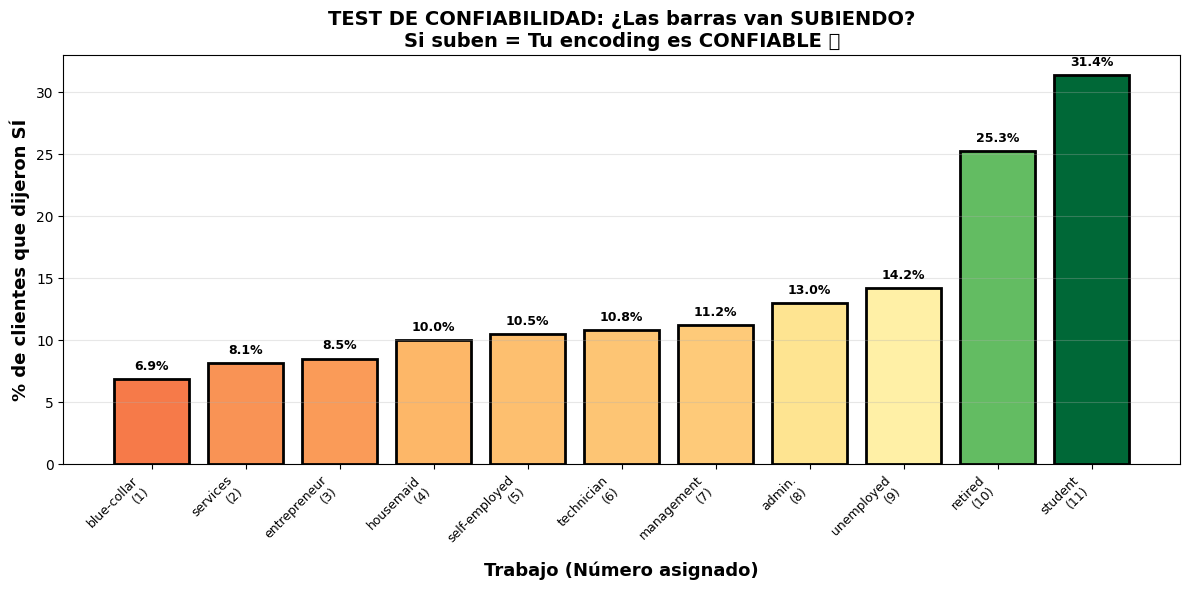

🔍 ANÁLISIS AUTOMÁTICO
✅ ¡PERFECTO! Las barras van subiendo en orden
✅ Esto significa que tu Target Encoding ES CONFIABLE
✅ Los trabajos con número más alto tienen más éxito

📈 Diferencia entre mejor y peor: 24.5 puntos porcentuales
✅ Diferencia MUY GRANDE → Tu encoding diferencia muy bien


In [32]:
import matplotlib.pyplot as plt

# Calcular % de éxito por cada ranking
test_confianza = df.groupby('job_ml_encoded')['y_numeric'].agg(['mean', 'count'])
test_confianza['porcentaje'] = test_confianza['mean'] * 100

# Obtener nombres de trabajos
mapeo_inverso = {v: k for k, v in ranking_ml.items()}
test_confianza['job_name'] = test_confianza.index.map(mapeo_inverso)

print("="*70)
print("📊 TABLA DE CONFIABILIDAD")
print("="*70)
print(test_confianza[['job_name', 'porcentaje', 'count']].to_string())
print("\n")

# Crear gráfico simple
fig, ax = plt.subplots(figsize=(12, 6))

# Colores del rojo (bajo) al verde (alto)
colors = plt.cm.RdYlGn(test_confianza['porcentaje'] / test_confianza['porcentaje'].max())
bars = ax.bar(range(len(test_confianza)), test_confianza['porcentaje'], 
              color=colors, edgecolor='black', linewidth=2)

ax.set_xticks(range(len(test_confianza)))
ax.set_xticklabels([f"{name}\n({int(rank)})" for rank, name in 
                     zip(test_confianza.index, test_confianza['job_name'])], 
                    rotation=45, ha='right', fontsize=9)
ax.set_ylabel('% de clientes que dijeron SÍ', fontsize=13, fontweight='bold')
ax.set_xlabel('Trabajo (Número asignado)', fontsize=13, fontweight='bold')
ax.set_title('TEST DE CONFIABILIDAD: ¿Las barras van SUBIENDO?\nSi suben = Tu encoding es CONFIABLE ✅', 
             fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, row in enumerate(test_confianza.itertuples()):
    ax.text(i, row.porcentaje + 0.5, f'{row.porcentaje:.1f}%', 
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis automático
print("="*70)
print("🔍 ANÁLISIS AUTOMÁTICO")
print("="*70)

# Verificar tendencia creciente
valores_porcentaje = test_confianza['porcentaje'].values
tendencia_creciente = all(valores_porcentaje[i] <= valores_porcentaje[i+1] 
                          for i in range(len(valores_porcentaje)-1))

if tendencia_creciente:
    print("✅ ¡PERFECTO! Las barras van subiendo en orden")
    print("✅ Esto significa que tu Target Encoding ES CONFIABLE")
    print("✅ Los trabajos con número más alto tienen más éxito")
else:
    print("⚠️ Atención: Las barras NO van en orden perfecto")
    print("⚠️ Algunos trabajos están fuera de lugar")
    
# Calcular diferencia
diferencia = test_confianza['porcentaje'].max() - test_confianza['porcentaje'].min()
print(f"\n📈 Diferencia entre mejor y peor: {diferencia:.1f} puntos porcentuales")

if diferencia > 10:
    print("✅ Diferencia MUY GRANDE → Tu encoding diferencia muy bien")
elif diferencia > 5:
    print("✅ Diferencia BUENA → Tu encoding funciona correctamente")
elif diferencia > 3:
    print("⚠️ Diferencia MODERADA → Funciona, pero podría mejorar")
else:
    print("❌ Diferencia PEQUEÑA → Los rangos no diferencian mucho")

print("="*70)

### 4.3.4 IGUALAR LA COLUMNA 'job' y job_ml_encoded'

In [35]:
df['job']=df['job_ml_encoded']
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_numeric,job_ml_encoded
0,56,4.0,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,4.0
1,57,2.0,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,2.0
2,37,2.0,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,2.0


### 4.3.4 ELIMINAR LA COLUMNA job_ml_encoded Y CONVERTIR LA NUEVA COLUMNA JOB CON LOS NUEVOS VALES CATEGORIZADOS

In [36]:
df.drop('job_ml_encoded', axis=1, inplace=True)
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_numeric
0,56,4.0,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,2.0,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,2.0,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0


## 4.4 CATEGORIZAR EDUCATION CON TARGET ECODING (MÉTODO ML)

### 4.4.1 APLICAR EL MÉTODO TARGET ECODING

In [34]:
# TARGET ENCODING: Asigna valores basados en la tasa de conversión de 'y' para cada categoría de 'education'
# Esto crea automáticamente un orden basado en la probabilidad de que el cliente contrate el depósito a plazo según su educación.

# Calcular la tasa de conversión por cada tipo de education (usando y_numeric)
target_encoding_education = df.groupby('education')['y_numeric'].mean().sort_values() # → Media de y_numeric por education
print("TARGET ENCODING PARA EDUCATION (Tasa de conversión 'yes'):")
print(target_encoding_education)
print(f"\n{'='*60}")

# Crear ranking basado en target encoding (mayor tasa = mayor ranking)
ranking_ml = {education: rank+1 for rank, education in enumerate(target_encoding_education.index)} # → Asigna un ranking basado en la posición en target_encoding_education
print("\nRANKING ML (basado en efectividad de conversión):")
for education, rank in sorted(ranking_ml.items(), key=lambda x: x[1], reverse=True):
    tasa = target_encoding_education[education]
    print(f"Rank {rank}: {education:<20} → Tasa conversión: {tasa:.2%}")

TARGET ENCODING PARA EDUCATION (Tasa de conversión 'yes'):
education
basic.9y               0.078246
basic.6y               0.082060
basic.4y               0.102490
high.school            0.108389
professional.course    0.113550
university.degree      0.137208
illiterate             0.222222
Name: y_numeric, dtype: float64


RANKING ML (basado en efectividad de conversión):
Rank 7: illiterate           → Tasa conversión: 22.22%
Rank 6: university.degree    → Tasa conversión: 13.72%
Rank 5: professional.course  → Tasa conversión: 11.35%
Rank 4: high.school          → Tasa conversión: 10.84%
Rank 3: basic.4y             → Tasa conversión: 10.25%
Rank 2: basic.6y             → Tasa conversión: 8.21%
Rank 1: basic.9y             → Tasa conversión: 7.82%


### 4.4.2 APLICAR TARGET ENCODING A LA COLUMNA EDUCATION

In [35]:
# Aplicar el ranking ML a la columna job
df['education_ml_encoded'] = df['education'].map(ranking_ml)

# Verificar la codificación
print("COMPARACIÓN: Job Original vs Target Encoding ML:")
comparacion = df[['education', 'education_ml_encoded']].drop_duplicates().sort_values('education_ml_encoded', ascending=False)
print(comparacion)

# Mostrar las primeras filas del DataFrame
print("\n" + "="*60)
print("PRIMERAS FILAS CON EDUCATION CODIFICADO:")
df[['education', 'education_ml_encoded', 'y']].head(10)

COMPARACIÓN: Job Original vs Target Encoding ML:
                education  education_ml_encoded
5393           illiterate                   7.0
25      university.degree                   6.0
6     professional.course                   5.0
1             high.school                   4.0
0                basic.4y                   3.0
3                basic.6y                   2.0
5                basic.9y                   1.0
7                     NaN                   NaN

PRIMERAS FILAS CON EDUCATION CODIFICADO:

                education  education_ml_encoded
5393           illiterate                   7.0
25      university.degree                   6.0
6     professional.course                   5.0
1             high.school                   4.0
0                basic.4y                   3.0
3                basic.6y                   2.0
5                basic.9y                   1.0
7                     NaN                   NaN

PRIMERAS FILAS CON EDUCATION CODIFICADO:


COMPARACIÓN: Job Original vs Target Encoding ML:
                education  education_ml_encoded
5393           illiterate                   7.0
25      university.degree                   6.0
6     professional.course                   5.0
1             high.school                   4.0
0                basic.4y                   3.0
3                basic.6y                   2.0
5                basic.9y                   1.0
7                     NaN                   NaN

PRIMERAS FILAS CON EDUCATION CODIFICADO:

                education  education_ml_encoded
5393           illiterate                   7.0
25      university.degree                   6.0
6     professional.course                   5.0
1             high.school                   4.0
0                basic.4y                   3.0
3                basic.6y                   2.0
5                basic.9y                   1.0
7                     NaN                   NaN

PRIMERAS FILAS CON EDUCATION CODIFICADO:


,education,education_ml_encoded,y
0,basic.4y,3.0,no
1,high.school,4.0,no
2,high.school,4.0,no
3,basic.6y,2.0,no
4,high.school,4.0,no
5,basic.9y,1.0,no
6,professional.course,5.0,no
7,NaN,NaN,no
8,professional.course,5.0,no
9,high.school,4.0,no


### 4.4.3 CONVERTIR LA VARIABLE EDUCATION CON LOS NUEVOS DATOS CATEGORIZADOS 

In [36]:
# Reemplazar la columna education con los rangos numéricos
df['education'] = df['education_ml_encoded']
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_numeric,education_ml_encoded
0,56,4.0,married,3.0,no,no,no,telephone,may,mon,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,3.0
1,57,2.0,married,4.0,NaN,no,no,telephone,may,mon,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,4.0
2,37,2.0,married,4.0,no,yes,no,telephone,may,mon,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,4.0


### 4.4.4 ELIMINAR LA VARIABLE 'education_ml_encoded' YA QUE NO LA VAMOS A USAR MAS 

In [37]:
df.drop('education_ml_encoded', axis=1, inplace=True)
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_numeric
0,56,4.0,married,3.0,no,no,no,telephone,may,mon,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,2.0,married,4.0,NaN,no,no,telephone,may,mon,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,2.0,married,4.0,no,yes,no,telephone,may,mon,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0


## 4.5 CATEGORIZAR LA VARIABLE MONTH (MÉTODO ECODING ORDINAL MANUAL)

In [38]:
# CATEGORIZACIÓN DE MONTH SEGÚN VALOR BANCARIO
# Diciembre tiene el valor más alto por ser temporada de bonos, aguinaldos y gastos navideños

mapeo_month = {
    'jan': 1,   # Enero - Inicio de año, después de gastos navideños
    'feb': 2,   # Febrero - Inicio de recuperación
    'mar': 3,   # Marzo - Impuestos
    'apr': 4,   # Abril - Post impuestos
    'may': 5,   # Mayo - Primavera
    'jun': 6,   # Junio - Mitad de año
    'jul': 7,   # Julio - Vacaciones de verano
    'aug': 8,   # Agosto - Fin de verano
    'sep': 9,   # Septiembre - Regreso a clases
    'oct': 10,  # Octubre - Preparación fin de año
    'nov': 11,  # Noviembre - Pre-navidad
    'dec': 12   # Diciembre - Bonos, aguinaldos, mayor capacidad de inversión
}

# Aplicar mapeo
df['month_categorizado'] = df['month'].map(mapeo_month)

# Mostrar resultado
print("CATEGORIZACIÓN DE MONTH:\n")
resultado = df[['month', 'month_categorizado']].drop_duplicates().sort_values(by='month_categorizado', ascending=False)
print(resultado)


CATEGORIZACIÓN DE MONTH:

      month  month_categorizado
27680   dec                  12
24064   nov                  11
23997   oct                  10
37887   sep                   9
18822   aug                   8
12137   jul                   7
7763    jun                   6
0       may                   5
27972   apr                   4
27690   mar                   3


### 4.5.1 REEMPLAZAR COLUMNA MONTH CON LOS NUEVOS VALORES CATEGORIZADOS Y ELIMINAR LA VARIABLE EXTRA CREADA

In [39]:
# Reemplazar la columna month con los valores numéricos
df['month'] = df['month_categorizado']
df.drop('month_categorizado', axis=1, inplace=True)
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_numeric
0,56,4.0,married,3.0,no,no,no,telephone,5,mon,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,2.0,married,4.0,NaN,no,no,telephone,5,mon,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,2.0,married,4.0,no,yes,no,telephone,5,mon,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0


## 4.6 CATEGORIZAR LA VARIABLE DAY OF WEEK (MÉTODO ECODING ORDINAL MANUAL)

In [40]:
# CATEGORIZACIÓN DE DAY_OF_WEEK SEGÚN VALOR BANCARIO
# Viernes tiene el valor más alto (día de pago, mayor disposición para productos bancarios)

mapeo_day_of_week = {
    'mon': 1,   # Lunes - Inicio de semana, menos disposición
    'tue': 2,   # Martes - Aún lejos del día de pago
    'wed': 3,   # Miércoles - Mitad de semana
    'thu': 4,   # Jueves - Acercándose al fin de semana
    'fri': 5    # Viernes - Día de pago, mayor disposición a productos financieros
}

# Aplicar mapeo
df['day_of_week_categorizado'] = df['day_of_week'].map(mapeo_day_of_week)

# Mostrar resultado
print("CATEGORIZACIÓN DE DAY_OF_WEEK:\n")
resultado = df[['day_of_week', 'day_of_week_categorizado']].drop_duplicates().sort_values(by='day_of_week_categorizado', ascending=False)
print(resultado)

CATEGORIZACIÓN DE DAY_OF_WEEK:

     day_of_week  day_of_week_categorizado
1579         fri                         5
1146         thu                         4
756          wed                         3
360          tue                         2
0            mon                         1
     day_of_week  day_of_week_categorizado
1579         fri                         5
1146         thu                         4
756          wed                         3
360          tue                         2
0            mon                         1


### 4.6.1 REEMPLAZAR COLUMNA DAY_OF_WEEK CON LOS NUEVOS VALORES CATEGORIZADOS Y ELIMINAR LA VARIABLE EXTRA CREADA

In [41]:
# Reemplazar la columna day_of_week con los valores numéricos
df['day_of_week'] = df['day_of_week_categorizado']
df.drop('day_of_week_categorizado', axis=1, inplace=True)
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_numeric
0,56,4.0,married,3.0,no,no,no,telephone,5,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,2.0,married,4.0,NaN,no,no,telephone,5,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,2.0,married,4.0,no,yes,no,telephone,5,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0


## 4.7 VERIFICACIÓN DEL CAMABIO DE CATEGORIA DE LAS VARIABLES TRABAJADAS

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             40846 non-null  float64
 2   marital         41096 non-null  object 
 3   education       39446 non-null  float64
 4   default         32580 non-null  object 
 5   housing         40186 non-null  object 
 6   loan            40186 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  int64  
 9   day_of_week     41176 non-null  int64  
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null  floa

## 4.8 CATEGORIZAR EL RESTO DE LAS VARIABLES 

In [43]:
# Separar variables categóricas y numéricas
categoricas = df.select_dtypes(include='object').columns.tolist()
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Convertir categóricas a números temporalmente
df_temp = df.copy()
for col in categoricas:
    df_temp[col] = df_temp[col].astype('category').cat.codes # Los valores -1 representan NaN

In [44]:
# Ver cómo se convirtieron las categorías a números en df_temp
print("CONVERSIÓN DE CATEGORÍAS A CÓDIGOS NUMÉRICOS:\n")

for col in categoricas:
    print(f"\n{col}:")
    cat_original = df[col].astype('category')
    print(f"Categorías originales: {cat_original.cat.categories.tolist()}")
    print(f"Códigos correspondientes: {list(range(len(cat_original.cat.categories)))}")

CONVERSIÓN DE CATEGORÍAS A CÓDIGOS NUMÉRICOS:


marital:
Categorías originales: ['divorced', 'married', 'single']
Códigos correspondientes: [0, 1, 2]

default:
Categorías originales: ['no', 'yes']
Códigos correspondientes: [0, 1]

housing:
Categorías originales: ['no', 'yes']
Códigos correspondientes: [0, 1]

loan:
Categorías originales: ['no', 'yes']
Códigos correspondientes: [0, 1]

contact:
Categorías originales: ['cellular', 'telephone']
Códigos correspondientes: [0, 1]

y:
Categorías originales: ['no', 'yes']
Códigos correspondientes: [0, 1]


### 4.8.1 INVERTIR CÓDIGOS: YES=0, NO=1 PARA VARIABLES BINARIAS

In [45]:
# Mapeo invertido: yes=0, no=1
mapeo_invertido = {'yes': 0, 'no': 1}

# Variables binarias a invertir
variables_binarias = ['default', 'housing', 'loan']

# Aplicar mapeo invertido en df_temp
for col in variables_binarias:
    if col in df_temp.columns:
        df_temp[col] = df[col].map(mapeo_invertido)
        print(f"{col}: yes=0, no=1")

default: yes=0, no=1
housing: yes=0, no=1
loan: yes=0, no=1


DA IGUAL EL VALOR 0 Y 1 EN ESTAS VARIABLES?

## 4.9 REEMPLAZAR VALORES POR NUEVOS CATEGORICOAS 

In [46]:
df['marital']= df_temp['marital']
df['default'] = df_temp['default']
df['housing'] = df_temp['housing']
df['loan'] = df_temp['loan']
df['contact'] = df_temp['contact']
df['y'] = df['y_numeric']

## 4.10 ELIMINAR LA VARIABLE 'y_numeric'

In [47]:
df.drop('y_numeric', axis=1, inplace=True)  # Eliminar la columna temporal y_numeric
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,4.0,1,3.0,1.0,1.0,1.0,1,5,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2.0,1,4.0,NaN,1.0,1.0,1,5,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2.0,1,4.0,1.0,0.0,1.0,1,5,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [48]:
df_temp.drop('y_numeric', axis=1, inplace=True)  # Eliminar la columna temporal y_numeric
df_temp.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,4.0,1,3.0,1.0,1.0,1.0,1,5,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2.0,1,4.0,NaN,1.0,1.0,1,5,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2.0,1,4.0,1.0,0.0,1.0,1,5,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


# 5 DIVISIÓN TRAIN TEST SPLIT 

In [49]:
# PASO 1: Preparar X e Y
X = df_temp.drop('y',axis=1)
Y = df_temp['y']
# PASO 2: Reemplazar -1 con NaN ANTES de dividir
X = X.replace(-1, np.nan)

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")
print(f"\n Valores nulos en train antes de imputar:")
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])
print(f"\n Valores nulos en test antes de imputar:")
print(X_test.isnull().sum()[X_test.isnull().sum() > 0])


Tamaño del conjunto de entrenamiento: (32940, 19)
Tamaño del conjunto de prueba: (8236, 19)

 Valores nulos en train antes de imputar:
job           275
marital        65
education    1392
default      6830
housing       789
loan          789
dtype: int64

 Valores nulos en test antes de imputar:
job            55
marital        15
education     338
default      1766
housing       201
loan          201
dtype: int64


# 6 IMPUTAR VARIABLES CON VALORES FALTANTES

In [51]:
# Aplicar MissForest SOLO en train
print("Entrenando MissForest con datos de entrenamiento...")
imputer = MissForest()
X_train_imputado = imputer.fit_transform(X_train)  # Fit + Transform

# Convertir a DataFrame
X_train_imputado = pd.DataFrame(
    X_train_imputado, 
    columns=X_train.columns, 
    index=X_train.index
)

print("\n Imputación de entrenamiento completada!")
print(f"\n Valores nulos en train después de imputar:")
print(X_train_imputado.isnull().sum().sum())

c:\Users\ingen\OneDrive\Escritorio\CURSO DE DATA SCIENCE\cathycaz-intro-ml\.venv\Lib\site-packages\missforest\missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "


Entrenando MissForest con datos de entrenamiento...


 80%|████████  | 4/5 [00:13<00:03,  3.11s/it]c:\Users\ingen\OneDrive\Escritorio\CURSO DE DATA SCIENCE\cathycaz-intro-ml\.venv\Lib\site-packages\missforest\missforest.py:303: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
c:\Users\ingen\OneDrive\Escritorio\CURSO DE DATA SCIENCE\cathycaz-intro-ml\.venv\Lib\site-packages\missforest\missforest.py:453: UserWarning: Stopping criterion triggered during fitting. Before last imputation matrix will be returned.
  warnings.warn(
 80%|████████  | 4/5 [00:15<00:03,  4.00s/it]c:\Users\ingen\OneDrive\Escritorio\CURSO DE DATA SCIENCE\cathycaz-intro-ml\.venv\Lib\site-packages\missforest\missforest.py:303: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
c:\Users\ingen\OneDrive\Escritorio\CURSO DE DATA SCIENCE\cathycaz-intro-ml\.venv\Lib\site-packages\missforest\missforest.py:453: UserWarning: Stopping criterion triggered during fitting. Before last imputation matrix will be returned.
  warnings.warn(
 80%|████████  |

c:\Users\ingen\OneDrive\Escritorio\CURSO DE DATA SCIENCE\cathycaz-intro-ml\.venv\Lib\site-packages\missforest\missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "


Entrenando MissForest con datos de entrenamiento...


 80%|████████  | 4/5 [00:13<00:03,  3.11s/it]c:\Users\ingen\OneDrive\Escritorio\CURSO DE DATA SCIENCE\cathycaz-intro-ml\.venv\Lib\site-packages\missforest\missforest.py:303: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
c:\Users\ingen\OneDrive\Escritorio\CURSO DE DATA SCIENCE\cathycaz-intro-ml\.venv\Lib\site-packages\missforest\missforest.py:453: UserWarning: Stopping criterion triggered during fitting. Before last imputation matrix will be returned.
  warnings.warn(
 80%|████████  | 4/5 [00:15<00:03,  4.00s/it]c:\Users\ingen\OneDrive\Escritorio\CURSO DE DATA SCIENCE\cathycaz-intro-ml\.venv\Lib\site-packages\missforest\missforest.py:303: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
c:\Users\ingen\OneDrive\Escritorio\CURSO DE DATA SCIENCE\cathycaz-intro-ml\.venv\Lib\site-packages\missforest\missforest.py:453: UserWarning: Stopping criterion triggered during fitting. Before last imputation matrix will be returned.
  warnings.warn(
 80%|████████  |


 Imputación de entrenamiento completada!

 Valores nulos en train después de imputar:
0


In [52]:
X_train_imputado.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12348,29,3.0,1.0,2.0,1.000000,0.0,0.0,1,7,5,286,3,999,0,1.4,93.918,-42.7,4.959,5228.1
8565,50,8.0,2.0,6.0,1.000000,1.0,1.0,1,6,3,178,6,999,0,1.4,94.465,-41.8,4.864,5228.1
21424,29,8.0,2.0,6.0,1.000000,1.0,1.0,0,8,2,103,4,999,0,1.4,93.444,-36.1,4.963,5228.1
3316,35,8.0,2.0,6.0,1.000000,1.0,1.0,1,5,4,135,1,999,0,1.1,93.994,-36.4,4.860,5191.0
33246,40,1.0,2.0,4.0,1.000013,1.0,1.0,0,5,2,418,1,999,0,-1.8,92.893,-46.2,1.291,5099.1
30543,45,3.0,1.0,3.0,0.999974,1.0,1.0,0,5,1,211,5,999,0,-1.8,92.893,-46.2,1.354,5099.1
6099,34,2.0,1.0,4.0,1.000000,0.0,0.0,1,5,2,596,1,999,0,1.1,93.994,-36.4,4.857,5191.0
6253,38,1.0,2.0,4.0,1.000000,1.0,1.0,1,5,2,364,2,999,0,1.1,93.994,-36.4,4.857,5191.0
13369,38,1.0,2.0,6.0,1.000000,1.0,1.0,0,7,3,176,1,999,0,1.4,93.918,-42.7,4.962,5228.1
27910,58,9.0,1.0,3.0,0.999932,0.0,1.0,0,3,4,439,4,999,0,-1.8,92.843,-50.0,1.538,5099.1


# 7 OUTLIERS

In [53]:
X_train_imputado.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32940.0,40.040650,10.431343,17.000000,32.000,38.000,47.000,98.000000
job,32940.0,5.203831,3.090525,0.626996,2.000,6.000,8.000,11.000000
marital,32940.0,1.168769,0.604553,0.000000,1.000,1.000,2.000,2.000000
education,32940.0,4.053406,1.733665,1.000000,3.000,4.000,6.000,7.000000
default,32940.0,0.999884,0.009764,0.000000,1.000,1.000,1.000,1.068877
housing,32940.0,0.461232,0.492614,0.000000,0.000,0.000,1.000,1.000000
loan,32940.0,0.846020,0.359639,0.000000,1.000,1.000,1.000,1.075917
contact,32940.0,0.365938,0.481700,0.000000,0.000,0.000,1.000,1.000000
month,32940.0,6.612083,2.042961,3.000000,5.000,6.000,8.000,12.000000
day_of_week,32940.0,2.979053,1.409392,1.000000,2.000,3.000,4.000,5.000000


In [52]:
"""# Reconvertir las categóricas
for col in categoricas:
    df[col] = df_temp[col].astype('category').cat.categories[df_imputado[col].astype(int)]"""

"# Reconvertir las categóricas\nfor col in categoricas:\n    df[col] = df_temp[col].astype('category').cat.categories[df_imputado[col].astype(int)]"